In [1]:
from pathlib import Path
from tqdm import tqdm
import re
from sklearn.metrics import pairwise_distances
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import pandas as pd
import numpy as np
import sys
import argparse

In [2]:
def get_ecfp_encoding(smiles, radius=2, nBits=1024):
    ecfp_lst = []
    for smile in smiles:
        mol = Chem.MolFromSmiles(smile) #, sanitize=False
        if not mol:
            print(f"Unable to compile SMILES: {smile}")
            sys.exit()
        features_vec = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)
        features = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(features_vec, features)
        ecfp_lst.append(features)
    ecfp_lst = np.array(ecfp_lst)
    return ecfp_lst

In [4]:
df = pd.read_csv("/data/qingyuyang/dta_ours/data/davis/drugs.csv")
smile_lst = df['iso_smiles'].unique().tolist()
drug_feature_lst = get_ecfp_encoding(smile_lst)

In [5]:
distance_matrix = pairwise_distances(X=drug_feature_lst, metric="jaccard")
list1 = []
for i in range(1, len(smile_lst)):
    for j in range(i):
        list1.append(distance_matrix[i,j])
print(np.min(distance_matrix), np.max(distance_matrix))

0.0 0.9509803921568627


/home/qingyuyang/anaconda3/envs/DTI_new/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [6]:
df = pd.read_csv("/data/qingyuyang/dta_ours/data/kiba/drugs.csv")
smile_lst = df['iso_smiles'].unique().tolist()
drug_feature_lst = get_ecfp_encoding(smile_lst)

In [7]:
distance_matrix = pairwise_distances(X=drug_feature_lst, metric="jaccard")
list2 = []
for i in range(1, len(smile_lst)):
    for j in range(i):
        list2.append(distance_matrix[i,j])
print(np.min(distance_matrix), np.max(distance_matrix))

/home/qingyuyang/anaconda3/envs/DTI_new/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


0.0 1.0


In [8]:
df = pd.read_csv("/data/qingyuyang/dta_ours/data/metz/drugs.csv")
smile_lst = df['iso_smiles'].unique().tolist()
drug_feature_lst = get_ecfp_encoding(smile_lst)

In [9]:
distance_matrix = pairwise_distances(X=drug_feature_lst, metric="jaccard")
list3 = []
for i in range(1, len(smile_lst)):
    for j in range(i):
        list3.append(distance_matrix[i,j])
print(np.min(distance_matrix), np.max(distance_matrix))

/home/qingyuyang/anaconda3/envs/DTI_new/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


0.0 1.0


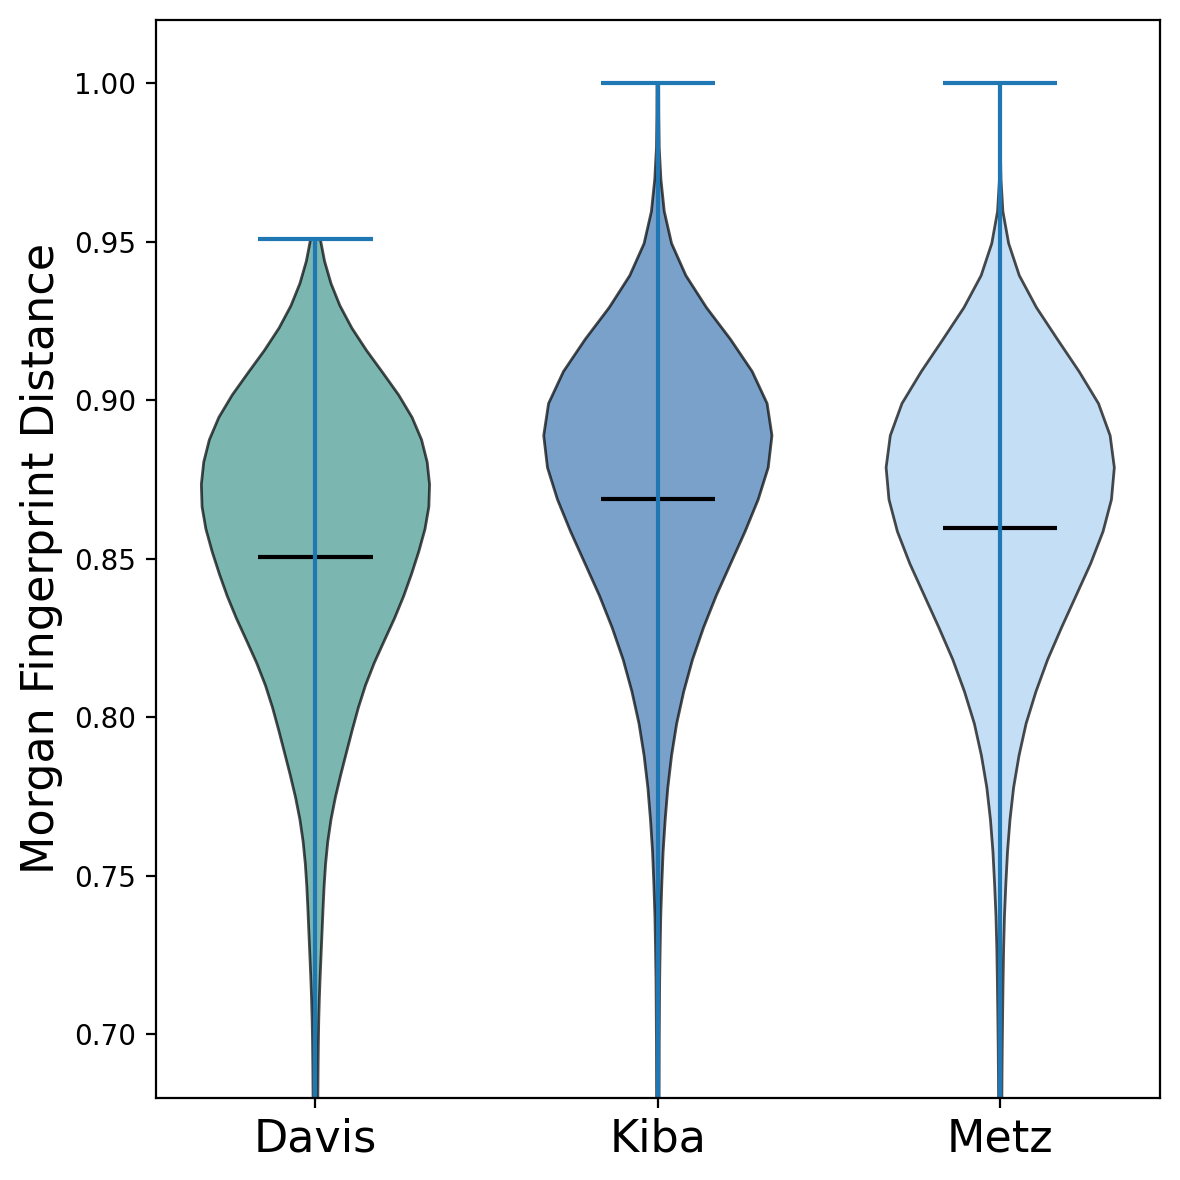

In [12]:
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200

# 创建图形
plt.figure(figsize=(6, 6))

# 绘制提琴图
violin_parts = plt.violinplot([list1, list2, list3], 
                             positions=[0.7, 1, 1.3],
                             widths=0.2,
                             showmeans=True,
                             showextrema=True)

# 设置颜色
colors = ['#43978F', '#427AB2', '#ABD0F1']
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# 自定义线条
violin_parts['cmeans'].set_color('black')

# 添加散点图显示数据点
#for i, data in enumerate([list1, list2]):
#    # 在x位置添加一些随机抖动
#    x = np.random.normal(i+1, 0.05, len(data))
#    plt.scatter(x, data, alpha=0.4, color=colors[i], s=20)

# 设置标签和标题
plt.xticks([0.7, 1, 1.3], ['Davis', 'Kiba', 'Metz'], fontsize=16)
plt.ylim([0.68, 1.02])
plt.ylabel('Morgan Fingerprint Distance', fontsize=16)
#plt.title('Distribution of Drug Pairwise Distance', fontsize=14)

# 添加图例
import matplotlib.patches as mpatches
#plt.legend(handles=legend_elements, loc='upper right', fontsize=12)

# 添加网格
#plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig('data_analysis_1.png')

plt.tight_layout()
plt.show()